In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(0)

In [3]:
g1 = ig.Graph.Erdos_Renyi(n=15, p=0.2, directed=False, loops=False)
g2 = ig.Graph.Erdos_Renyi(n=15, p=0.2, directed=False, loops=False)

In [4]:
g3 = ig.Graph.Erdos_Renyi(n=20, m=35, directed=False, loops=False)
g4 = ig.Graph.Erdos_Renyi(n=20, m=35, directed=False, loops=False)

In [5]:
ig.summary(g1)
ig.summary(g2)
ig.summary(g3)
ig.summary(g4)

IGRAPH U--- 15 23 -- 
IGRAPH U--- 15 28 -- 
IGRAPH U--- 20 35 -- 
IGRAPH U--- 20 35 -- 


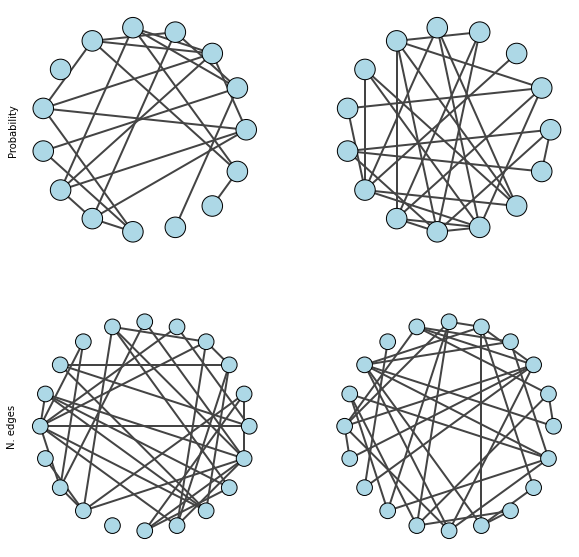

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Probability
ig.plot(
    g1,
    target=axs[0, 0],
    layout="circle",
    vertex_color="lightblue"
)
ig.plot(
    g2,
    target=axs[0, 1],
    layout="circle",
    vertex_color="lightblue"
)
axs[0, 0].set_ylabel('Probability')
# N edges
ig.plot(
    g3,
    target=axs[1, 0],
    layout="circle",
    vertex_color="lightblue",
    vertex_size=0.15
)
ig.plot(
    g4,
    target=axs[1, 1],
    layout="circle",
    vertex_color="lightblue",
    vertex_size=0.15
)
axs[1, 0].set_ylabel('N. edges')
plt.show()

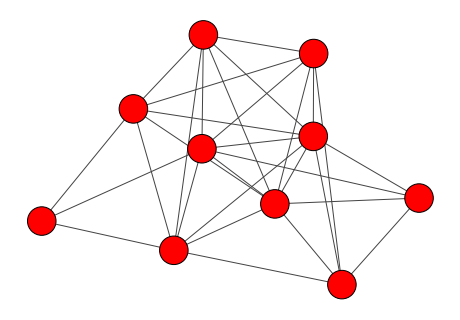

In [45]:
watts_g = ig.Graph.Watts_Strogatz(dim=1, size=10, nei=3, p=0.5)

fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
        watts_g,
        target=ax,
        vertex_size=0.3,
        edge_width=1,
    )
plt.show()

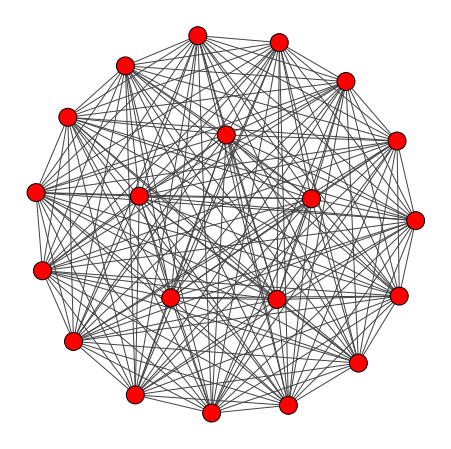

In [23]:
barabasi_g = ig.Graph.Barabasi(n=20, m=35)

fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
        barabasi_g,
        target=ax,
        vertex_size=0.3,
        edge_width=1,
    )
plt.show()